In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])

In [4]:
df.columns=['clas label','Alcohol','Malic acid']

In [5]:
df

,clas label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

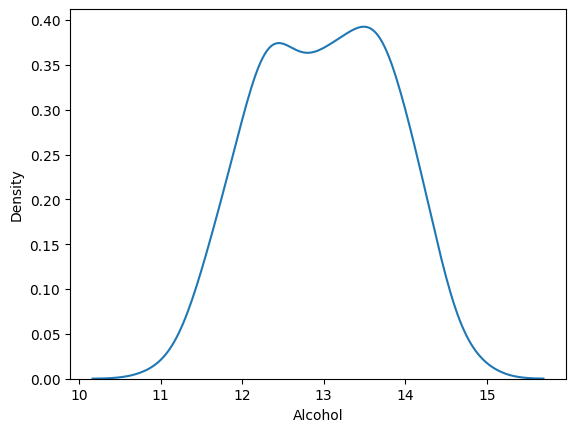

In [6]:
sns.kdeplot(df['Alcohol'])

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(df[['Alcohol','Malic acid']],df['clas label'],test_size=0.3,random_state=0)

In [10]:
x_te.shape

(54, 2)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(x_tr)
x_te_sca=scaler.transform(x_te)
x_tr_sca=scaler.transform(x_tr)


In [33]:
x_te_sca=pd.DataFrame(x_te_sca,columns=['Alcohol','Malic acid'])
x_tr_sca=pd.DataFrame(x_tr_sca,columns=['Alcohol','Malic acid'])

In [14]:
x_tr_sca.head(2)

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034


In [15]:
np.round(x_tr.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [16]:
np.round(x_tr_sca.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Robust

In [18]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit_transform(x_tr)
x_te_sca_ro=scaler.transform(x_te)
x_tr_sca_ro=scaler.transform(x_tr)

In [19]:
x_te_sca_ro=pd.DataFrame(x_te_sca,columns=['Alcohol','Malic acid'])
x_tr_sca_ro=pd.DataFrame(x_tr_sca,columns=['Alcohol','Malic acid'])

In [37]:
np.round(x_tr.describe(),1)
x_tr.median()

,0
Alcohol,13.040
Malic acid,1.885


Text(0.5, 1.0, 'After Scaling')

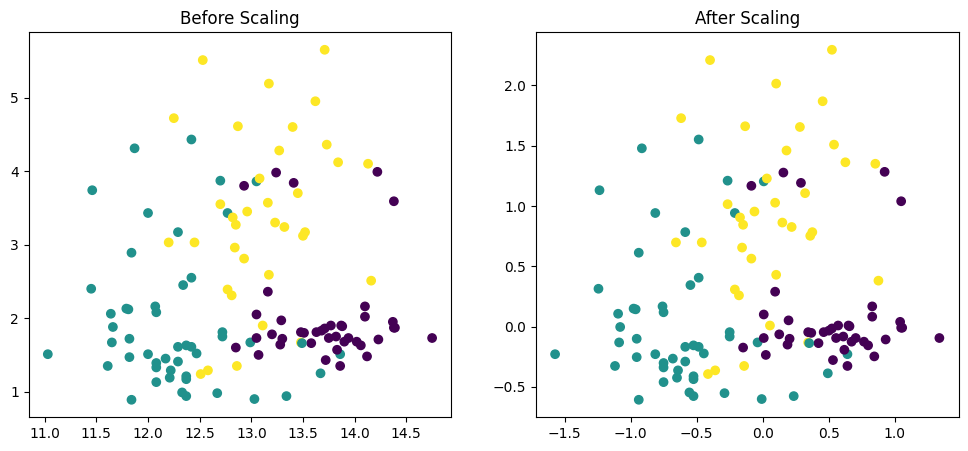

In [26]:
fig,(plt1,plt2)=plt.subplots(ncols=2,figsize=(12,5))

plt1.scatter(x_tr['Alcohol'],x_tr['Malic acid'],c=y_tr)
plt1.set_title('Before Scaling')
plt2.scatter(x_tr_sca_ro['Alcohol'],x_tr_sca_ro['Malic acid'],c=y_tr)
plt2.set_title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

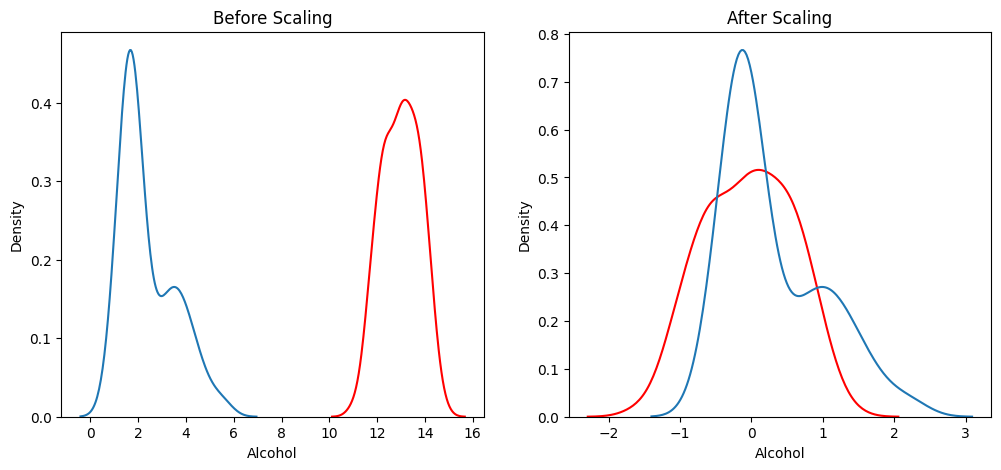

In [39]:
fig,(plt1,plt2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_tr['Alcohol'],color='red',ax=plt1)
sns.kdeplot(x_tr['Malic acid'],ax=plt1)
plt1.set_title('Before Scaling')
sns.kdeplot(x_tr_sca_ro['Alcohol'],color='red',ax=plt2)
sns.kdeplot(x_tr_sca_ro['Malic acid'],ax=plt2)
plt2.set_title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

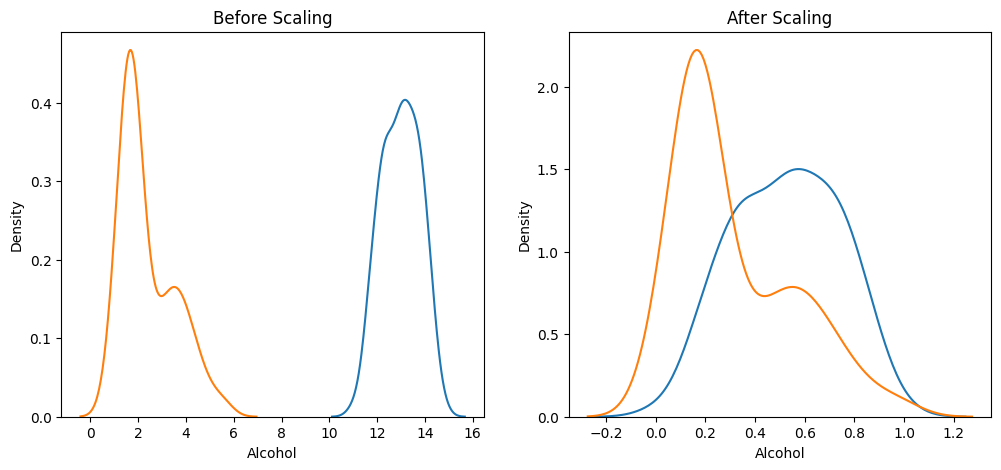

In [34]:
fig,(plt1,plt2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_tr['Alcohol'],ax=plt1)
sns.kdeplot(x_tr['Malic acid'],ax=plt1)
plt1.set_title('Before Scaling')
sns.kdeplot(x_tr_sca['Alcohol'],ax=plt2)
sns.kdeplot(x_tr_sca['Malic acid'],ax=plt2)
plt2.set_title('After Scaling')